# 4o e 5o Lab de PSD (notebook para preencher com os resultados)

### Número do Grupo : `Grupo 8`

---



In [1]:
#
# Primeiro vamos importar as bibliotecas necessárias
#
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math
from scipy.signal import convolve, correlate

## Definição do par de transformadas DFT - (direta e inversa)   

O par de transformadas discretas de Fourier (Discrete Fourier Transform - DFT) para um sinal de tempo discreto $x[k]$ com índice das amostras igual $k$ e o correspondente espectro de Fourier $X[\mu]$ com índice de frequências $\mu$ é calculado como  
\begin{align}
\text{DFT}: Y[\mu]=&\sum_{k=0}^{N-1}x[k]\cdot\mathrm{e}^{-\mathrm{j}\frac{2\pi}{N}k\mu}\\
\text{IDFT}: x[k]=\frac{1}{N}&\sum_{\mu=0}^{N-1}Y[\mu]\cdot\mathrm{e}^{+\mathrm{j}\frac{2\pi}{N}k\mu}
\end{align}

Observe o sinal negativo na função exponential da transformada direta (DFT) e o fator de normalização $1/N$ na transformada inversa (IDFT). Essa convensão é usada pela maioria dos livros textos de DSP e também pela biblioteca Python `numpy.fft.fft()`, `numpy.fft.ifft()` e funções do Matlab `fft()`, `ifft()`.

# PROBLEMA 1

## DFT e IDFT com "loops for"

Agora vamos implementar a DFT e a IDFT usando "loops for". Embora isso possa ser útil para entender e validar algoritmos em sua fase inicial de desenvolvimento, isso deve ser evitado para um código usado na prática: "loops for" normalmente são lentos e muitas vezes mais complicados de ler do que implementações usando matrizes e vetores. Especialmente para $N$ muito grandes, o tempo de computação é muito longo.

De qualquer forma, o conceito de "loop for" é: a DFT pode ser implementada com um "loop for" externo iterando sobre $\mu$ e um "loop for" interno somando todos os $k$ para um $\mu$ específico.

Usamos variável com subscrito _ aqui, a fim de salvar bons nomes de variáveis para o cálculo baseado em matriz.

## Parte A 

Escreva as funções DFT e IDFT que calculam, respectivamente, as transformadas discretas de Fourier direta e inversa. 

In [2]:
#
# Função para calcular a DFT (com loops for) de um sinal de valor complexo (dtype=complex)
#
# Entrada: x -> vetor contendo as amostras (números complexos) do sinal no tempo 
# Saída: Y -> vetor contendo os coeficientes espectrais (números complexos) - (dtype=complex)
#
def DFT_1D(x):
    
    N = len(x)
    Y = np.zeros((N, 1), dtype=complex)  # alloc RAM, init with zeros
    for mu_ in range(N):  # do for all DFT frequency indices
        for k_ in range(N):  # do for all sample indices
            Y[mu_] += x[k_] * np.exp(-1j*2*np.pi/N*k_*mu_)
    
    return Y    

In [3]:
#
# Função para calcular a IDFT (com loops for) de um sinal de valor complexo (dtype=complex)
#
# Entrada: Y -> vetor contendo os coeficientes espectrais (números complexos) 
# Saída: x -> vetor contendo as amostras (números complexos) do sinal no tempo 
#
def IDFT_1D(Y):
    
    N = len(Y)
    x = np.zeros((N, 1), dtype=complex)  # alloc RAM, init with zeros
    for k_ in range(N):
        for mu_ in range(N):
            x[k_] += Y[mu_] * np.exp(+1j*2*np.pi/N*k_*mu_)
    x *= 1/N  # normalization in the IDFT stage
    
    return x    

## Parte B 

Estude o código abaixo que cria uma sinal discreto composto pela soma de três ondas senoides com amplitude e frequências distintas. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


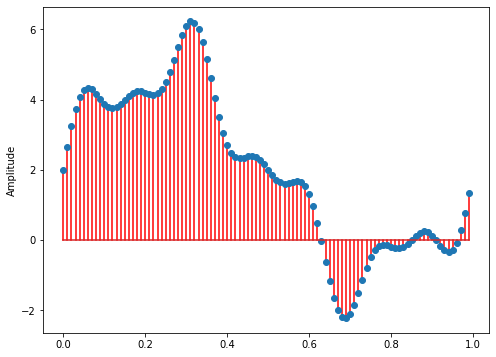

In [4]:
# taxa de amostragem (sampling rate)
sr = 100

# intervalo de amostragem
ts = 1.0/sr
t = np.arange(0,1,ts)

x = 2

freq = 1.
x += 3*np.sin(2*np.pi*freq*t)

freq = 4
x += 1*np.sin(2*np.pi*freq*t)

freq = 7   
x += 0.5*np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.stem(t, x, linefmt='red')
plt.ylabel('Amplitude')

plt.show()

## Parte C 

Escreva um código que utilize a função DFT criada anteriormente para calcular e plotar o espectro de frequências (abs(Y)) do sinal $x$ criado acima. 

**OBS**: Observe que a DFT codificada recebe como entrada um sinal complexo e o sinal acima é do tipo real. Portanto, transforme o sinal $x$ em uma sequência complexa com a parte imaginária igual a zero. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


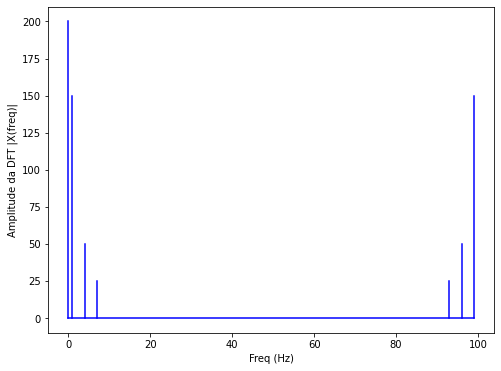

In [5]:
# tamanho do vetor
N = len(x)

#for i in range(N):
#    x[i] = x[i] * (-1)**i

# cria um vetor de números complexos
x_ = x + 1j*0

# chamada à função DFT
Y = DFT_1D(x_)

# calcula a frequência
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (8, 6))
plt.stem(freq, abs(Y), linefmt='blue', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('Amplitude da DFT |X(freq)|')
plt.show()

No gráfico acima é possível notar que a saída da DFT é simétrica na metade da taxa de amostragem (você pode tentar uma taxa de amostragem diferente para testar). 

Essa metade da taxa de amostragem é chamada de **frequência de Nyquist**, em homenagem ao engenheiro eletrônico **Harry Nyquist**. Harry Nyquist e Claude Shannon criaram o famoso teorema de amostragem de **Nyquist-Shannon**, que afirma que um sinal amostrado a uma taxa $f_s$ pode ser totalmente reconstruído se contiver apenas componentes de frequência abaixo da metade dessa frequência de amostragem, ou seja, a taxa de amostragem deve ser maior que duas vezes a máxima frequência do sinal, $f_s > f_{max}$.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves th

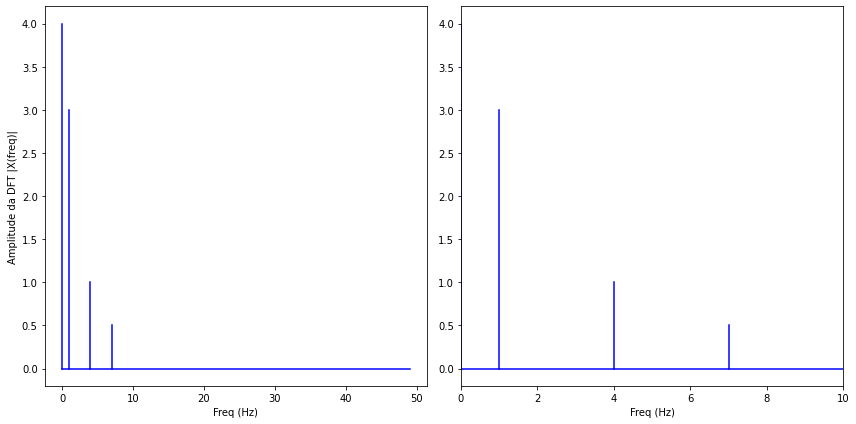

In [6]:
n_oneside = N//2

# obtem as frequências de um lado
f_oneside = freq[:n_oneside]

# normaliza a amplitude do sinal
Y_oneside =Y[:n_oneside]/n_oneside

plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(f_oneside, abs(Y_oneside), linefmt='blue', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('Amplitude da DFT |X(freq)|')

plt.subplot(122)
plt.stem(f_oneside, abs(Y_oneside), linefmt='blue', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
# Limita o eixo x até frequência de 10 Hz
plt.xlim(0, 10)

plt.tight_layout()
plt.show()

## Limitações da DFT implementada

O principal problema com a implementação da DFT acima é que ela não é eficiente se tivermos um sinal com muitas amostras. Nesse caso, o cálculo da DFT pode levar muito tempo.

## Parte D

Escreva uma função em python que implemente o sinal indicado abaixo. 

\begin{equation}
f(t) = 3sin(2\pi f t),
\end{equation}

sendo $f=2$ Hz

In [7]:
# 
# sr = taxa de amostragem
#
def sinal(sr):
    '''
    função para gerar um sinal 1D simples com diferentes taxas de amostragem
    '''
    ts = 1.0/sr
    t = np.arange(0,1,ts)

    freq = 2.
    x = 3*np.sin(2*np.pi*freq*t)

    return x

## Parte E

Escreva um simples programa em python que varia a taxa de amostragem (sr) do sinal acima de 500 e 1000, com passo de 100 e, para cada uma das taxas, determine a DFT do sinal gerado e imprima o tempo de de execução.

**OBS** Use o código abaixo como exemplo de como medir o tempo de execução

import time
start_time = time.time()
main()
print("--- %s seconds ---" % (time.time() - start_time))

In [8]:
import time

start = 500
stop  = 1000
step  = 100

for i in range(start, stop+step, step):
    x = sinal(i)
    x_ = x + 1j*0

    start_time = time.time()
    Y = DFT_1D(x_)
    print("--- %s seconds ---" % (time.time() - start_time))

--- 1.3393597602844238 seconds ---
--- 2.3570520877838135 seconds ---
--- 5.392733573913574 seconds ---
--- 6.654425144195557 seconds ---
--- 4.423466682434082 seconds ---
--- 4.605173349380493 seconds ---


## Parte F

Agora, utilize a função IDFt para obter e plotar o sinal original $x$ criado na "parte A" a partir do seu espetro $Y$ obtido na "parte C"

**OBS**: Observe que a IDFT codificada recebe como entrada um sinal complexo e retorna um sinal complexo. Portanto, para obter o sinal $x$ criado na "parte A", você precisa utilizar apenas a parte real do sinal de retorno. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this,

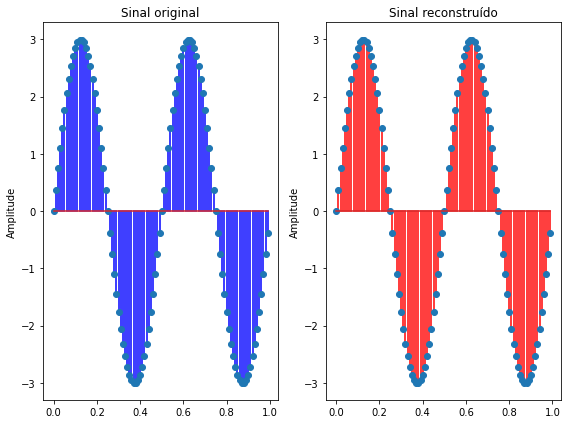

In [9]:
#
# Taxa de amostragem (sampling rate)
#
sr = 100
ts = 1.0/sr
t = np.arange(0,1,ts)

#
# Constroe o sinal complexo
#
x_o = sinal(sr)
x_c = x_o + 1j*0

#
# transformada direta
#
Y = DFT_1D(x_c)

#
# transformada inversa
#
x_c = IDFT_1D(Y)

#
# extrai sinal original
#
x_r = np.real(x_c)

#
# Plota os sinais original e reconstruído
#
plt.figure(figsize=[8, 6.])
plt.subplot(1, 2, 1)
plt.title("Sinal original")
plt.stem(t, x_o, linefmt='blue')
plt.ylabel('Amplitude')

plt.subplot(1, 2, 2)
plt.title("Sinal reconstruído")
plt.stem(t, x_r, linefmt='red')
plt.ylabel('Amplitude')
plt.tight_layout()

# PROBLEMA 2

## Parte A

Estenda para sinais 2D (imagens) os códigos da DFT e IDFT implementados anteriormente para sinais 1D

**DICA**: Use do fato que a 2D-DFT pode ser escrita a partir da 1D-DFT, como indicado abaixo


\begin{equation}
F(u,v) = \frac{1}{MN} \sum_{x=0}^{N} \sum_{y=0}^{M} f(x,y) e^{-j 2\pi \left( \frac{ux}{N} + \frac{vy}{M} \right)} = \frac{1}{M} \sum_{y=0}^{M} \left[ \frac{1}{N} \sum_{x=0}^{N} f(x,y)  e^{-j 2\pi \frac{ux}{N}} \right] e^{-j 2\pi \frac{vy}{M}} 
\end{equation}

In [10]:
#
# Função para calcular a DFT (com loops for) de um sinal de valor complexo (dtype=complex)
#
# Entrada: x -> vetor contendo as amostras (números complexos) do sinal no tempo 
# Saída: Y -> vetor contendo os coeficientes espectrais (números complexos) - (dtype=complex)
#
def DFT_2D(x):

    rows, cols = x.shape
    Y = np.empty_like(x) 
    
    for row in range(0,rows):
        Y[row,:] = DFT_1D(x[row,:]).reshape((rows,))
    Y = Y.transpose()
    for col in range(0,cols):
        Y[col,:] = DFT_1D(x[col,:]).reshape((cols,))
    Y = Y.transpose()
    
    return Y    

In [11]:
import cv2
import matplotlib.pyplot as plt

fileName = "cameraman.tiff"

im_gray = cv2.imread(fileName, cv2.IMREAD_GRAYSCALE)
im_cplx = im_gray + 1j*0

In [12]:
#
# Função para calcular a iDFT (com loops for) de um sinal de valor complexo (dtype=complex)
#
# Entrada: Y -> vetor contendo os coeficientes espectrais (números complexos) 
# Saída: x -> vetor contendo as amostras (números complexos) do sinal no tempo 
#
def IDFT_2D(Y):
    
    rows, cols = Y.shape
    x = np.empty_like(Y) 
    
    for row in range(0,rows):
        x[row,:] = DFT_1D(Y[row,:]).reshape((rows,))
    x = x.transpose()
    for col in range(0,cols):
        x[col,:] = DFT_1D(Y[col,:]).reshape((cols,))
    x = x.transpose()
    
    return x    

## Parte B

Escreva um código simples que leia a imagem **cameraman.tiff**, calcule a sua DFT e plote o espectro de Fourier. 

**OBS**: Use a função do opencv para a leitura e visualização da imagem e do seu espetro.

**DICA de USO - Leitura e Escrita de uma imagem**

im_gray = cv2.imread('Nome_da_Imagem', cv2.IMREAD_GRAYSCALE)

cv2.imwrite('Nome_da_Imagem', im_gray)

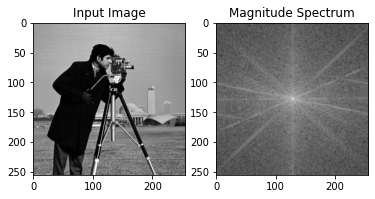

In [13]:
import cv2
import matplotlib.pyplot as plt

fileName = "cameraman.tiff"

im_gray = cv2.imread(fileName, cv2.IMREAD_GRAYSCALE)

f = np.fft.fft2(im_gray)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift) + 1)

plt.subplot(121),plt.imshow(im_gray, cmap = 'gray')
plt.title('Input Image')
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum')
plt.show()


# PROBLEMA 3

## Parte A - Representação matricial da DFT - (transformada direta)

Como vimos em sala de aula, a DFT pode ser escrita na forma matricial como indicado abaixo.

\begin{equation}
    \textrm{DFT : } \quad F_{k} = \sum_{n=0}^{N-1}x_n\cdot e^{-\frac{j2\pi kn}{N}} =  \sum_{n=0}^{N-1}x_n\cdot (W_{N})^{kn}, \quad k=0,1,\ldots,N-1  \nonumber
\end{equation}

sendo $W_N = e^{-\frac{j2\pi}{N}}$ o núcleo da transformada.	

\begin{equation}
		\begin{bmatrix}
			F_{0} \\ F_{1} \\ F_{2} \\ \vdots \\ F_{N-1}
		\end{bmatrix}
		=
		\begin{bmatrix}
			1      & 1           & 1              & \dots  & 1               \\
			1      & W_{N}       & W_{N}^2        & \dots  & W_{N}^{N-1}     \\
			1      & W_{N}^{2}   & W_{N}^4        & \dots  & W_{N}^{2(N-1)}  \\
			\vdots & \vdots      & \vdots         & \ddots & \vdots          \\
			1      & W_{N}^{N-1} & W_{N}^{2(N-1)} & \dots  & W_{N}^{(N-1)^2} 
		\end{bmatrix}
		\begin{bmatrix}
			x_0 \\ x_1  \\ x_2 \\ \vdots \\ x_{N-1} 
		\end{bmatrix} \nonumber
\end{equation}

Escreva um código que implemente a matrix da DFT como indicada acima. 

**DICA**: Estude a função meshgrid do numpy. Crie um meshgrid de tamanho $N \times N$ e utilize os seus índices para gerar a matrix $W$

In [14]:
#
# Entrada: N -> tamanho da matrix DFT
# Saída: W -> matrix DFT
#
def DFT_matrix(N):
    x = np.linspace(0, N - 1, N)
    y = np.linspace(0, N - 1, N)
    xx, yy = np.meshgrid(x, y)

    W = np.zeros(N, dtype = complex)
    W = np.exp((-1j * 2 * np.pi)/N)**(xx*yy)
    
    return W

Utilizando a matriz DFT gerada acima, encontre o espectro de Fourier do sinal gerado no PROBLEMA 1 - Parte B e compare o resultado com o resultado obtido no PROBLEMA 1 - Parte C.

## Parte B - Representação matricial da iDFT - (transformada inversa)

Como vimos em sala de aula, a iDFT pode ser escrita na forma matricial como indicado abaixo.

\begin{equation}
    \textrm{iDFT : } \quad x_{n} = \frac{1}{N}\sum_{K=0}^{N-1}F_k\cdot e^{\frac{j2\pi kn}{N}}, \quad n=0,1,\ldots,N-1  \nonumber
\end{equation}

\begin{equation}
    \begin{bmatrix}
        x_{0} \\ x_{1} \\ x_{2} \\ \vdots \\ x_{N-1}
    \end{bmatrix}
    = \frac{1}{N}
    \begin{bmatrix}
        1      & 1              & 1               & \dots  & 1               \\
        1      & W_{N}^{-1}     & W_{N}^{-2}      & \dots  & W_{N}^{-(N-1)}     \\
        1      & W_{N}^{-2}     & W_{N}^{-4}      & \dots  & W_{N}^{-2(N-1)}  \\
        \vdots & \vdots         & \vdots          & \ddots & \vdots          \\
        1      & W_{N}^{-(N-1)} & W_{N}^{-2(N-1)} & \dots  & W_{N}^{-(N-1)^2} 
        \end{bmatrix}
        \begin{bmatrix}
        F_0 \\ F_1  \\ F_2 \\ \vdots \\ F_{N-1} 
    \end{bmatrix} \nonumber
\end{equation}

Escreva um código que implemente a matrix da iDFT como indicada acima e plot o sinal gerado. Verifique se o sinal é igual ao sinal original usado como entrada na parte A desse problema.

In [15]:
#
# Entrada: N -> tamanho da matrix DFT
# Saída: W -> matrix DFT
#
def iDFT_matrix(N):
    x = np.linspace(0, N - 1, N)
    y = np.linspace(0, N - 1, N)
    xx, yy = np.meshgrid(x, y)

    W = np.zeros(N, dtype = complex)
    W = 1/N*np.exp((1j * 2 * np.pi)/N)**(xx*yy)
    return W

## Parte C - caso 2D

Pense em como usar as matrizes DFTs 1D implementadas anteriormente para o caso de imagens (sinal 2D)

In [16]:
def DFT_2D_using_DFT_1D(N):
  _x, _y = N.shape
  _dft_matrix = DFT_matrix(_x)
  _xT = np.array(N).T
  W = np.zeros((_x, _y), dtype = complex)

  for i in range(_y):
    W[i,:] = np.dot(_dft_matrix, _xT[i,:])

  return W

# PROBLEMA 4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


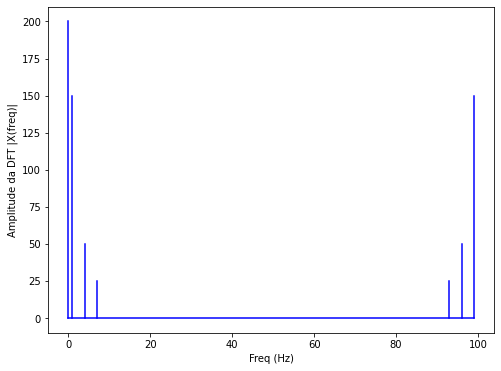

In [17]:
# taxa de amostragem (sampling rate)
sr = 100

# intervalo de amostragem
ts = 1.0/sr
t = np.arange(0,1,ts)

x = 2

freq = 1.
x += 3*np.sin(2*np.pi*freq*t)

freq = 4
x += 1*np.sin(2*np.pi*freq*t)

freq = 7   
x += 0.5*np.sin(2*np.pi*freq*t)

# tamanho do vetor
N = len(x)

# cria um vetor de números complexos
x_ = x + 1j*0

# calcula a frequência
n = np.arange(N)
T = N/sr
freq = n/T 

dftm = DFT_matrix(len(x))

x_to_col = x.reshape(-1, 1)
Y_of_x = np.dot(dftm, x_to_col)

plt.figure(figsize = (8, 6))
plt.stem(freq, abs(Y_of_x), linefmt='blue', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('Amplitude da DFT |X(freq)|')
plt.show()

Como vimos na teoria, a convolução de dois sinais no domínio do tempo/espaço é realizada na frequência como a multiplicação das transformadas de Fourier dos respectivos sinais.

## Parte A - implementação dos passos 1 a 3

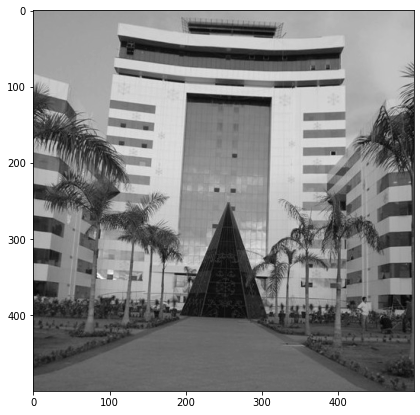

In [18]:
# Leitura de imagem
img = cv2.imread('predio.jpg', cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=[7,7])
plt.imshow(img, cmap='gray')
plt.show()

In [19]:
#
# Step 1 - Padding da imagem
#

img_rows, img_cols = img.shape

img_padded = np.zeros((512, 512), dtype=img.dtype)

for row in range(img_rows):
  for col in range(img_cols):
    img_padded[row, col] = img[row, col]

#
# Step 2 - Multiplicao da imagem após padding por (-1)^(x+y)
# 

img_rows, img_cols = img_padded.shape
for row in range(img_rows):
  for col in range(img_cols):
    img_padded[row, col] = img_padded[row, col]*((-1)**(row*col))

#
# Step 3 - Converter imagem do domínio do espaço para o domínio da frequência
#
# OBS: Nesse passo, utilize a função np.fft.fft2() do numpy
#

img_Y = np.fft.fft2(img_padded)

**OBS1**: Lembre que a transformada de fourier gera um conjunto de números complexos

$F(\mu) = Real(\mu) + j*Imaginária(\mu)$

e, portanto, podemos calcular


$Magnitude = |F(\mu)| = \sqrt{(Real(\mu)² + Imaginaria(\mu)²)}$


$Fase = \phi(\mu)) = atan⁻¹\left( \frac{Imaginaria(\mu)}{Real(\mu)} \right)$


**OBS2**: Lembre que, para melhor visualização do espectro de Fourier, é importante alterar a faixa dinâmica da magnitude dos coeficientes, como:

$c*log(1+|F(\mu)|)$

sendo $c$ uma constante para escalonamento. Use $c=30$ para melhor visualização.

Crie um subplot (plt.subplot()) que mostre a magnitude (antes e depois o escalonamento indicado acima) e a fase do espectro.  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


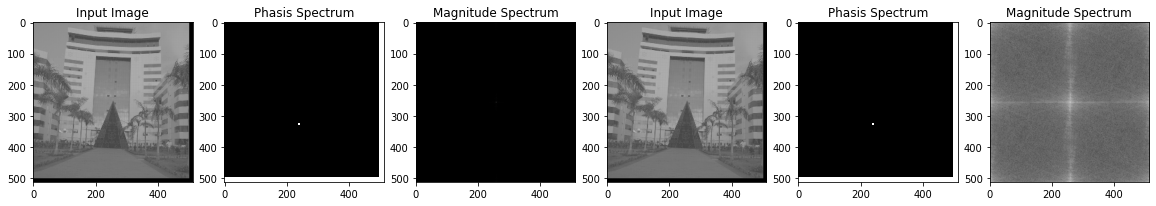

In [20]:
img_Y_shift = np.fft.fftshift(img_Y)

plt.figure(figsize = (20, 20))

phasis_spectrum = np.arctan(np.imag(img_padded) / np.real(img_padded))

# Without scaling
plt.subplot(161),plt.imshow(img_padded, cmap = 'gray')
plt.title('Input Image')
plt.subplot(162),plt.imshow(phasis_spectrum, cmap = 'gray')
plt.title('Phasis Spectrum')
plt.subplot(163),plt.imshow(np.abs(img_Y_shift), cmap = 'gray')
plt.title('Magnitude Spectrum')

magnitude_spectrum = 30*np.log(np.abs(img_Y_shift) + 1)

plt.subplot(164),plt.imshow(img_padded, cmap = 'gray')
plt.title('Input Image')
plt.subplot(165),plt.imshow(phasis_spectrum, cmap = 'gray')
plt.title('Phasis Spectrum')
plt.subplot(166),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum')
plt.show()

Crie um subplot (plt.subplot()) que mostre a magnitude escalonada do espectro **com e sem** a execução do Step 2. Estude os resultados.

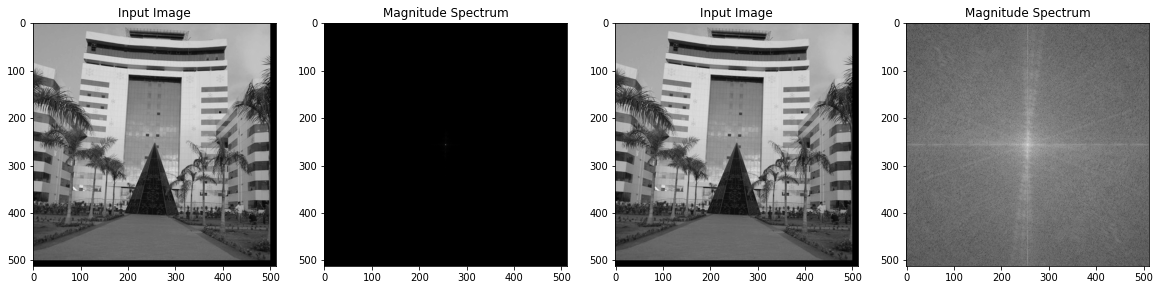

In [21]:
# Leitura de imagem
img = cv2.imread('predio.jpg', cv2.IMREAD_GRAYSCALE)

#
# Step 1 - Padding da imagem
#

img_rows, img_cols = img.shape
img_padded = np.zeros((512, 512), dtype=img.dtype)

for row in range(img_rows):
  for col in range(img_cols):
    img_padded[row, col] = img[row, col]

#
# Step 3 - Converter imagem do domínio do espaço para o domínio da frequência
#
# OBS: Nesse passo, utilize a função np.fft.fft2() do numpy
#
img_Y = np.fft.fft2(img_padded)
img_Y_shift = np.fft.fftshift(img_Y)

plt.figure(figsize = (20, 20))

plt.subplot(141),plt.imshow(img_padded, cmap = 'gray')
plt.title('Input Image')
plt.subplot(142),plt.imshow(np.abs(img_Y_shift), cmap = 'gray')
plt.title('Magnitude Spectrum')

magnitude_spectrum = 30*np.log(np.abs(img_Y_shift) + 1)

plt.subplot(143),plt.imshow(img_padded, cmap = 'gray')
plt.title('Input Image')
plt.subplot(144),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum')
plt.show()

# <img src="fft_steps.png" width="80%" height="100%">

## Parte B - implementação do passo 4

In [22]:
#
# Step 4 - geração de um filtro passa-baixa (de tamanho PxQ) no domínio da frequência 
# 
def ideal_low_pass_filter(img, radius):
    '''Cria um filtro passa-baixa de mesma dimensão que img. 
       radius define o raio do filtro, isto é, a máxima frequência que será mantida na imagem'''
    
    num_rows, num_cols = img.shape
    freq_r = np.fft.fftfreq(num_rows)
    freq_c = np.fft.fftfreq(num_cols)
    freq_r = np.fft.fftshift(freq_r)
    freq_c = np.fft.fftshift(freq_c)  
    
    low_pass_filter = np.zeros([num_rows, num_cols])
    for row in range(num_rows):
        for col in range(num_cols):
            distance = np.sqrt(freq_r[row]**2 + freq_c[col]**2)
            if distance <= radius:
                low_pass_filter[row, col] = 1
                
    return low_pass_filter

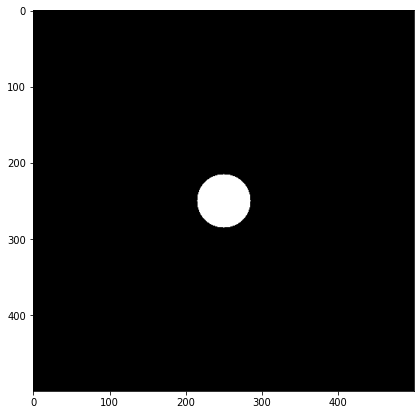

In [23]:
# 
# Crie e mostre (plt.imshow) um filtro usando o código acima com radius = 0.07
#
plt.figure(figsize=[7,7])
plt.imshow(ideal_low_pass_filter(img, 0.07), cmap='gray')
plt.show()

## Parte C - implementação do passo 5

Implemente abaixo a seguinte equação: $G(\mu, v) = H(\mu, v).F(\mu, v) $

In [24]:
def G(_padded_img):
  eFaumdeMiV = np.fft.fft2(_padded_img)
  HzaumdeMiV = ideal_low_pass_filter(_padded_img, 0.07)
  return eFaumdeMiV * HzaumdeMiV

## Parte D - implementação do passo 6

Implemente um código que faça a conversão da imagem do domínio da frequência para o domínio do espaço.

Plot o resultado obtido.

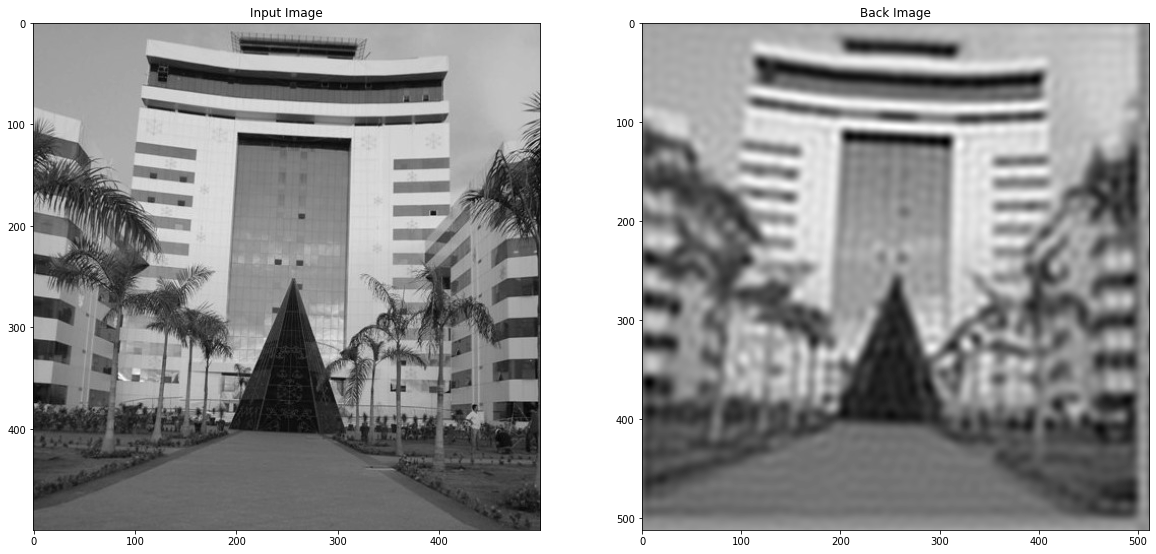

In [25]:
plt.figure(figsize = (20, 20))

img = cv2.imread('predio.jpg', cv2.IMREAD_GRAYSCALE)

img_rows, img_cols = img.shape
img_padded = np.zeros((512, 512), dtype=img.dtype)
for row in range(img_rows):
  for col in range(img_cols):
    img_padded[row, col] = img[row, col]

img_rows, img_cols = img_padded.shape
for row in range(img_rows):
  for col in range(img_cols):
    img_padded[row, col] = img_padded[row, col]*((-1)**(row+col))

FdeMiV = np.fft.fft2(img_padded)
HdeMiV = ideal_low_pass_filter(img_padded, 0.07)
GdeMiV = FdeMiV * HdeMiV

img_back = np.fft.ifft2(GdeMiV)

img_rows, img_cols = img_back.shape
for row in range(img_rows):
  for col in range(img_cols):
    img_back[row, col] = img_back[row, col]*((-1)**(row+col))

img_back = np.real(img_back)

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image')
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Back Image')
plt.show()

## Parte E - implementação do passo 7

Implemente um código para extrair a região $M \times N$ do quadrante superior esquerda da imagem resultante do passo 6.

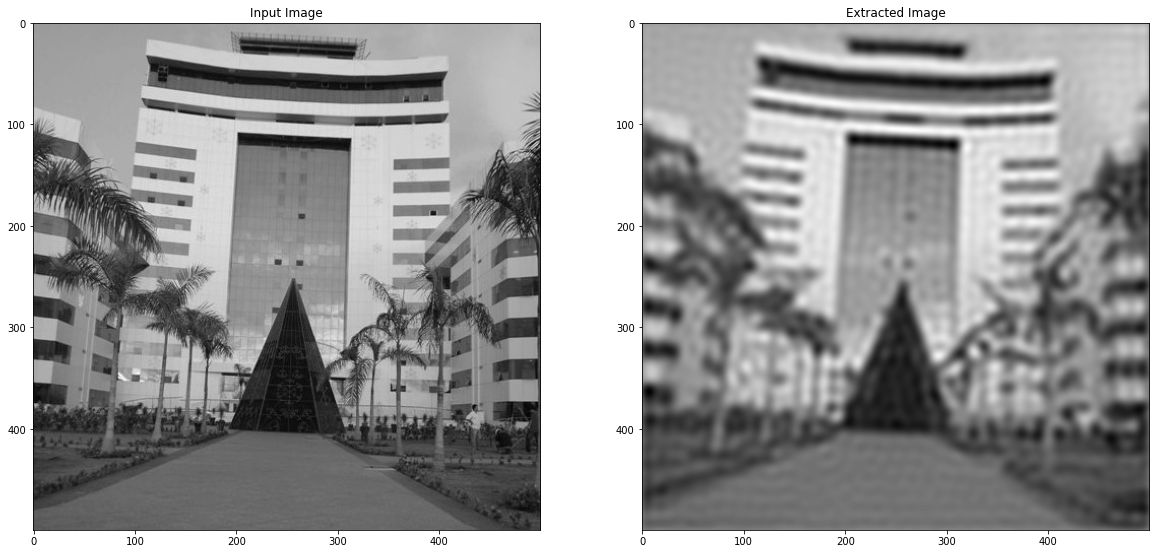

In [26]:
img_rows, img_cols = img.shape
img_out = np.zeros((img_rows, img_cols))
for row in range(img_rows):
  for col in range(img_cols):
    img_out[row, col] = img_back[row, col]

plt.figure(figsize = (20, 20))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image')
plt.subplot(122),plt.imshow(img_out, cmap = 'gray')
plt.title('Extracted Image')
plt.show()

## Parte F - implementação de um filtro passa baixa Gaussiano

Modifique o código do passo 4 para criar um filro passa baixa Gaussiano. 

Usando esse novo filtro execute novamente os passos 5, 6 e 7. Analise os resultados obtidos usando os dois filtros.

In [66]:
from IPython.core.pylabtools import select_figure_formats
def gaussian_low_pass_filter(img, radius, sigma):
    num_rows, num_cols = img.shape
    freq_r = np.fft.fftfreq(num_rows)
    freq_c = np.fft.fftfreq(num_cols)
    freq_r = np.fft.fftshift(freq_r)
    freq_c = np.fft.fftshift(freq_c)

    low_pass_filter = np.zeros([num_rows, num_cols])
    for row in range(num_rows):
        for col in range(num_cols):
          distance = np.sqrt(freq_r[row]**2 + freq_c[col]**2)
          low_pass_filter[row, col] = (1/(2*np.pi*(sigma**2)))*(np.exp(-1*(distance**2)/(2*(sigma**2))))
            #distance = np.sqrt(freq_r[row]**2 + freq_c[col]**2)
            #if distance <= radius:
            #    low_pass_filter[row, col] = (1/(2*np.pi*(sigma**2)))*(np.exp(-1*((row**2)+(col**2))/(2*(sigma**2))))
    
    return low_pass_filter

# That's All Folks

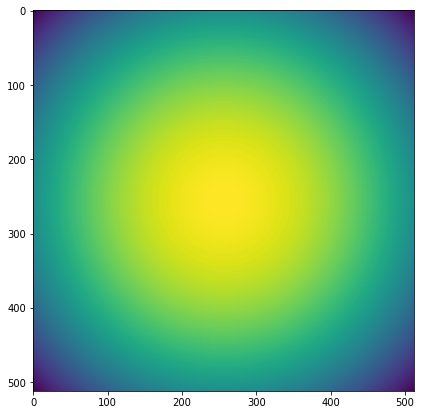

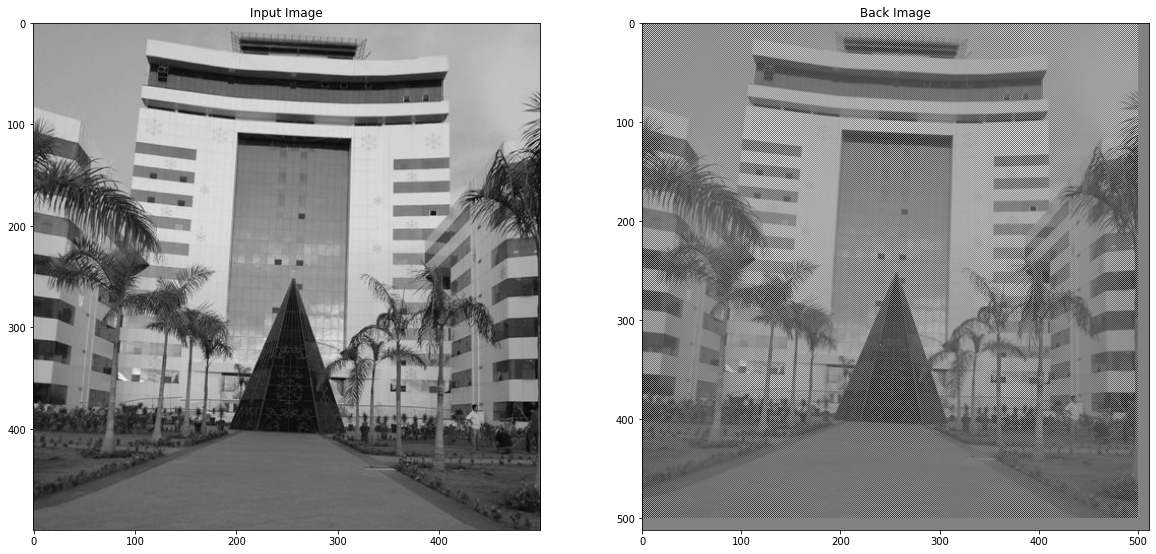

In [69]:
plt.figure(figsize=[7,7])
plt.imshow(gaussian_low_pass_filter(img_padded, 0.07, 2))
plt.show()

plt.figure(figsize = (20, 20))

img = cv2.imread('predio.jpg', cv2.IMREAD_GRAYSCALE)

img_rows, img_cols = img.shape
img_padded = np.zeros((512, 512), dtype=img.dtype)
for row in range(img_rows):
  for col in range(img_cols):
    img_padded[row, col] = img[row, col]

img_rows, img_cols = img_padded.shape
for row in range(img_rows):
  for col in range(img_cols):
    img_padded[row, col] = img_padded[row, col]*((-1)**(row+col))

FdeMiV = np.fft.fft2(img_padded)
HdeMiV = gaussian_low_pass_filter(img_padded, 0.07, 5)
GdeMiV = FdeMiV * HdeMiV

img_back = np.fft.ifft2(GdeMiV)

img_rows, img_cols = img_back.shape
for row in range(img_rows):
  for col in range(img_cols):
    img_back[row, col] = img_back[row, col]*((-1)**(row+col))

img_back = np.real(img_back)

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image')
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Back Image')
plt.show()